Pour encore aller plus loin, bien comprendre les algorithmes. Nous avons codé de fond en comble l'algorithme k-means (cf. dossier kmeans)

In [1]:
%matplotlib inline
from matplotlib import rcParams
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import pandas as pd

   # Linear SVM

In [2]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

#     svs = svm_clf.support_vectors_
#     plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [3]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris virginica
svm_clf = Pipeline([
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
])
svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

/home/campus-5/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/campus-5/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 1.0, '$C = 100$')

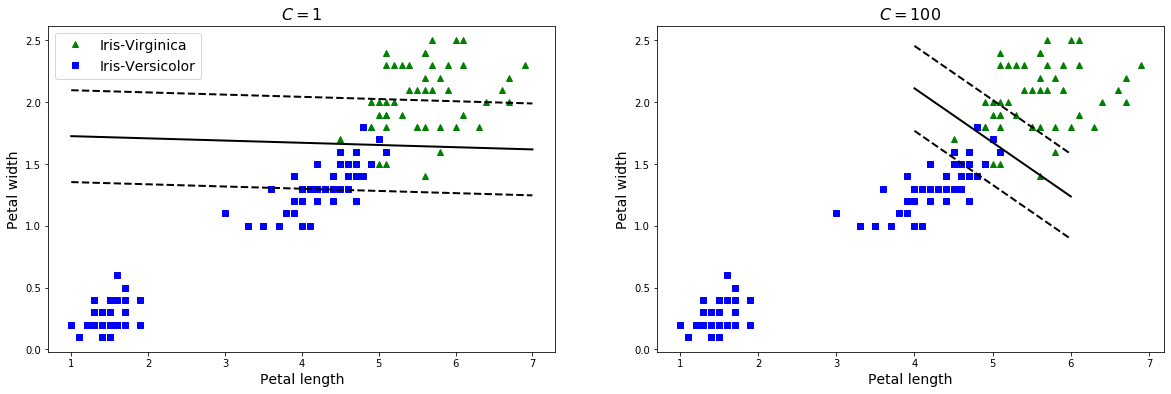

In [4]:
svm_clf = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf.fit(X,y)

plt.figure(figsize=(20,6))
plt.subplot(121)

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plot_svc_decision_boundary(svm_clf, 1, 7)
plt.title("$C = {}$".format(svm_clf.C), fontsize=16)
plt.legend(loc="upper left", fontsize=14)

svm_clf = LinearSVC(C=100, loss="hinge", random_state=42)
svm_clf.fit(X,y)

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("$C = {}$".format(svm_clf.C), fontsize=16)

/home/campus-5/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/campus-5/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[4, 6, 0.8, 2.8]

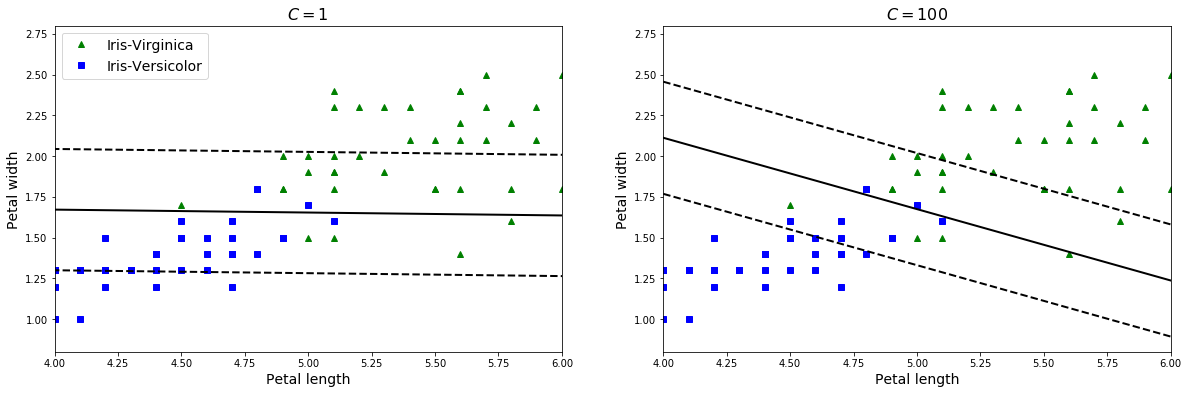

In [5]:
svm_clf = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf.fit(X,y)

plt.figure(figsize=(20,6))
plt.subplot(121)

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plot_svc_decision_boundary(svm_clf, 1, 7)
plt.title("$C = {}$".format(svm_clf.C), fontsize=16)
plt.legend(loc="upper left", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])

svm_clf = LinearSVC(C=100, loss="hinge", random_state=42)
svm_clf.fit(X,y)

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("$C = {}$".format(svm_clf.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

The C parameter trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors.

# Non linear SVM

In [6]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

/home/campus-5/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

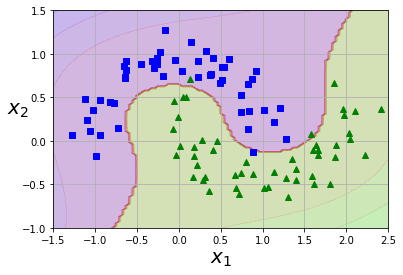

In [7]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

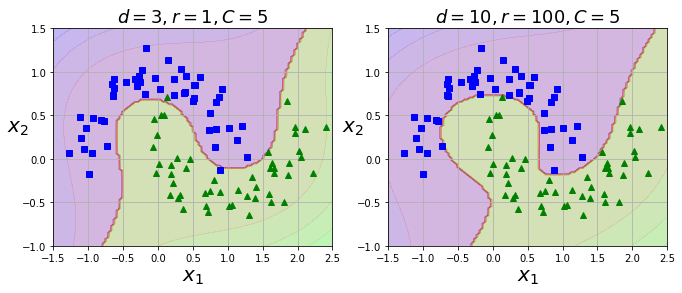

In [8]:
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

plt.show()

In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

#Making 1-100 numbers
a = np.arange(1,100,1)
b = np.arange(1,100,1)*5
c=np.concatenate((a, b), axis=0).T
a = a[:,np.newaxis]

b = b[:,np.newaxis]

c=np.column_stack((a,b))

#Scaling data with 0 mean and 1 standard Deviation, so it can be observed easily
scaler = StandardScaler()
c = scaler.fit_transform(c)

#Applying PolynomialFeatures
poly = PolynomialFeatures(degree=3)
c_poly = poly.fit_transform(c)

#Flattening Polynomial feature matrix (Creating 1D array), so it can be plotted. 
# a_poly = a_poly.flatten()
#Creating array of size a_poly with number series. (For plotting)
c_poly

array([[ 1.00000000e+00, -1.71464282e+00, -1.71464282e+00,
         2.94000000e+00,  2.94000000e+00,  2.94000000e+00,
        -5.04104989e+00, -5.04104989e+00, -5.04104989e+00,
        -5.04104989e+00],
       [ 1.00000000e+00, -1.67965011e+00, -1.67965011e+00,
         2.82122449e+00,  2.82122449e+00,  2.82122449e+00,
        -4.73867002e+00, -4.73867002e+00, -4.73867002e+00,
        -4.73867002e+00],
       [ 1.00000000e+00, -1.64465740e+00, -1.64465740e+00,
         2.70489796e+00,  2.70489796e+00,  2.70489796e+00,
        -4.44863044e+00, -4.44863044e+00, -4.44863044e+00,
        -4.44863044e+00],
       [ 1.00000000e+00, -1.60966469e+00, -1.60966469e+00,
         2.59102041e+00,  2.59102041e+00,  2.59102041e+00,
        -4.17067406e+00, -4.17067406e+00, -4.17067406e+00,
        -4.17067406e+00],
       [ 1.00000000e+00, -1.57467198e+00, -1.57467198e+00,
         2.47959184e+00,  2.47959184e+00,  2.47959184e+00,
        -3.90454378e+00, -3.90454378e+00, -3.90454378e+00,
        -3.

## RBP kernel

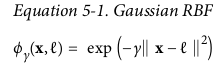

This is a bell-shaped function varying from 0 (very far away from the landmark) to 1
(at the landmark). Now we are ready to compute the new features. For example, let’s
look at the instance x 1 = –1: it is located at a distance of 1 from the first landmark and
2 from the second landmark. Therefore its new features are x 2 = exp(–0.3 × 1 2 ) ≈ 0.74
and x 3 = exp(–0.3 × 2 2 ) ≈ 0.30.

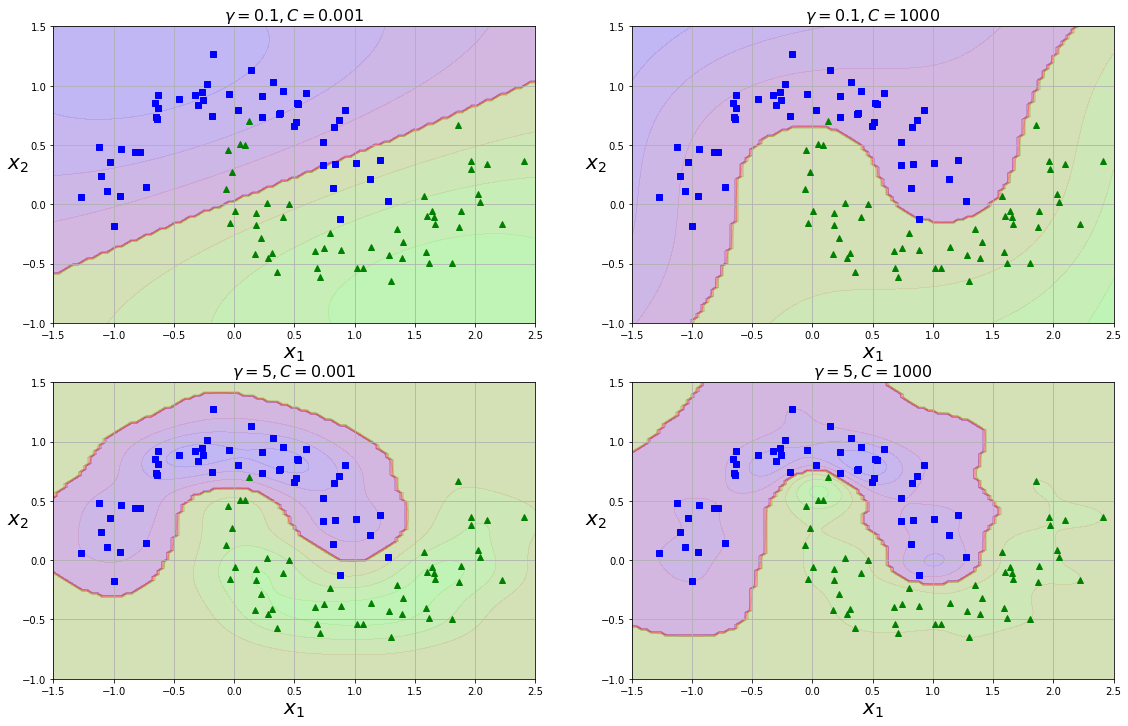

In [10]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(19, 12))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

plt.show()

Increasing gamma
makes the bell-shaped curve narrower (see the lefthand plots in Figure 5-8). As a
result, each instance’s range of influence is smaller: the decision boundary ends up
being more irregular, wiggling around individual instances. Conversely, a small gamma
value makes the bell-shaped curve wider: instances have a larger range of influence,
and the decision boundary ends up smoother. So γ acts like a regularization
if your model is overfitting, you should reduce it; if it is underfitting,
you should increase it (similar to the C hyperparameter).

## SVM regression

To
use SVMs for regression instead of classification, the trick is to reverse the objective:
instead of trying to fit the largest possible street between two classes while limiting
margin violations, SVM Regression tries to fit as many instances as possible on the
street while limiting margin violations (i.e., instances off the street). The width of the
street is controlled by a hyperparameter, ε .

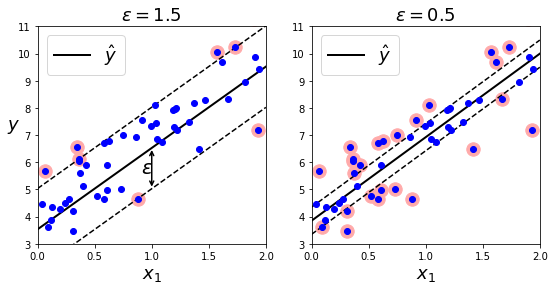

In [11]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)

plt.show()

# Learning curves

   ## Example

In [12]:
def plot_learning_curves(model, X, y, classes_max, ylim=False,rmsemax=5):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, classes_max):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()
    if ylim:
        plt.axis((0,classes_max,0,rmsemax))

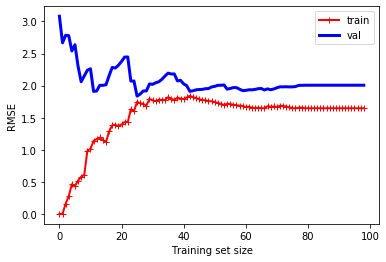

In [13]:
lin_reg = LinearRegression()

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plot_learning_curves(lin_reg,X,y,100)

These learning curves are typical of a model that’s underfitting. Both curves have
reached a plateau; they are close and fairly high

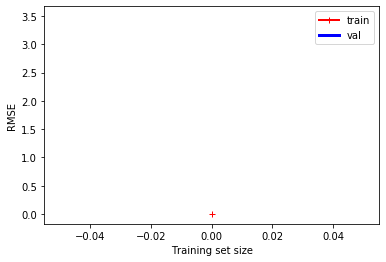

In [14]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y,2)

The error on the training data is much lower than with the Linear Regression
model. <br><br>
There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hall‐
mark of an overfitting model. If you used a much larger training set, however, the
two curves would continue to get closer.

The Bias/Variance Trade-off
<p>An important theoretical result of statistics and Machine Learning is the fact that a
model’s generalization error can be expressed as the sum of three very different
errors:<br><br>
Bias<br>
This part of the generalization error is due to wrong assumptions, such as assum‐
ing that the data is linear when it is actually quadratic. A high-bias model is most
likely to underfit the training data. <br><br>
Variance<br>
This part is due to the model’s excessive sensitivity to small variations in the
training data. A model with many degrees of freedom (such as a high-degree pol‐
ynomial model) is likely to have high variance and thus overfit the training data.<br><br>
Irreducible error<br>
This part is due to the noisiness of the data itself. The only way to reduce this
part of the error is to clean up the data (e.g., fix the data sources, such as broken
sensors, or detect and remove outliers).<br><br>
Increasing a model’s complexity will typically increase its variance and reduce its bias.
Conversely, reducing a model’s complexity increases its bias and reduces its variance.
This is why it is called a trade-off.

## trees

### Importing stuff

In [15]:
X=pd.read_pickle('../11 - AI - trees/trees_first_clean.pkl')
X.head()

,CODE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT_DESC,ADR_SECTEUR,GENRE_BOTA,ESPECE,VARIETE,STADEDEDEVELOPPEMENT,COLLECTIVITE,LON,LAT,ANNEEDEPLANTATION
0,ESP32632,Arbre,ESP174,Arbre d'espaces ouverts,Prc Echangeurs Bastion St Roch,5,Acer,pseudoplatanus,NaN,Arbre adulte,Ville de Grenoble,5.740727,45.190539,2001.0
1,ESP32631,Arbre,ESP174,Arbre d'espaces ouverts,Prc Echangeurs Bastion St Roch,5,Acer,pseudoplatanus,NaN,Arbre adulte,Ville de Grenoble,5.740748,45.190525,2001.0
2,ESP32630,Arbre,ESP174,Arbre d'espaces ouverts,Prc Echangeurs Bastion St Roch,5,Acer,pseudoplatanus,NaN,Arbre adulte,Ville de Grenoble,5.740697,45.190498,2001.0
3,ESP32629,Arbre,ESP174,Arbre d'espaces ouverts,Prc Echangeurs Bastion St Roch,5,Acer,pseudoplatanus,NaN,Arbre adulte,Ville de Grenoble,5.740675,45.190491,2001.0
4,ESP32628,Arbre,ESP174,Arbre d'espaces ouverts,Prc Echangeurs Bastion St Roch,5,Acer,pseudoplatanus,NaN,Arbre adulte,Ville de Grenoble,5.740702,45.190479,2001.0


In [16]:
Y=X.pop('ANNEEDEPLANTATION')

#Important!!! Use the same parameters -> 20%, random seed generator=41.
# X_train, X_test, Y_train, Y_test = train_test_split(df_trees, df_trees_Y, test_size=0.2, random_state=41)

In [17]:
set_genre_non_desiree = {'Aesculus','Fraxinus','Platanus','Betula','Castanea','Cupressus','Olea' }
set_especes_non_desiree = {'Acer saccharinum',
                            'Albizzia julibrissin',
                            'Catalpa bignonoides',
                            'Ginkgo biloba',
                            'Gleditsia triacanthos',
                            'Koelreuteria paniculata',
                            'Laburnum anagyroides',
                            'Paulownia tomentosa',
                            'Prunus pissardi',
                            'Sophora japonica',
                            'Acer palmatum',
                            'Acer pseudoplatanus',
                           'Cryptomeria japonica',
                            'Davidia involucrata',
                           'Fagus sylvatica',
                           'Juglans nigra',
                           'Juglans ailantifolia',
                            'Liriodendron tulipifera',
                           'Magnolia grandiflora',
                           'Nerium oleander',
                           'Picea abies',
                           'Populus alba',
                           'Quercus bicolor',
                           'Quercus macrocarpa',
                           'Quercus nigra',
                           'Quercus rubra',
                           'Quercus alba',
                           'Salix alba',
                           'Salix gracolistyla',
                           'Salix daphnoides',
                           'Salix cinerea',
                           'Salix arenaria',
                           'Salix acutifolia',
                           'Sorbus aucuparia',
                            'Acer platanoides',
                            'Acer pseudoplatanus',
                           'Platanus acrifolia'
                          }
set_espece_absolument_non_desiree={'Ailanthus altissima','Robinia pseudoacacia',
                            'Acer negundo',}

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

#Custom transformers
class MergingTextColumns(BaseEstimator, TransformerMixin):
    def __init__(self,list_columns=[],space=True,drop=False,name='MergedTextColumn'): # no *args or **kargs
        self.list_columns=list_columns
        self.space=space
        self.name=name
        self.drop=drop
    def fit(self,X,Y=None):
        return self
    def transform(self,X):
        Xc=X.copy()
        if self.space:
            Xc[self.name]=Xc[self.list_columns[0]]+' '+Xc[self.list_columns[1]]
        else:
            Xc[self.name]=Xc[self.list_columns[0]]+Xc[self.list_columns[1]]
        if self.drop:
            Xc.drop(self.list_columns,inplace=True,axis=1)
        return Xc

class WantedTrees(BaseEstimator, TransformerMixin):
    def __init__(self,column='',species_unwanted={},undesirable={}): # no *args or **kargs
        self.column=column
        self.species_unwanted=species_unwanted
        self.undesirable=undesirable
    def encoding(self,spe):
        if spe in self.species_unwanted:
            return 1
        elif spe in self.undesirable:
            return 2
        else:
            return 0
    def fit(self,X,Y=None):
        return self
    def transform(self,X):
        Xc=X.copy()
        Xc.ESPECE_SCIENTIFIQUE=Xc.ESPECE_SCIENTIFIQUE.apply(lambda x: self.encoding(x))
        return Xc

#Defining different attributes
# all_attribs = ['SOUS_CATEGORIE_DESC','STADEDEDEVELOPPEMENT','LON','LAT','ADR_SECTEUR']
num_attribs = ['LON','LAT','ADR_SECTEUR']
cat_attribs = ['SOUS_CATEGORIE_DESC','STADEDEDEVELOPPEMENT','GENRE_BOTA','ESPECE']

#Defining text pipeline: columns selecter, changing Nans by most frequent values, Encoding text values, standardizing
text_pipeline = Pipeline([
# ('selecter',SelectColumns(list_columns=cat_attribs)),
('merger',MergingTextColumns(list_columns=['GENRE_BOTA','ESPECE'],name='ESPECE_SCIENTIFIQUE',drop=True)),
('desirability',WantedTrees(species_unwanted=set_especes_non_desiree,undesirable=set_espece_absolument_non_desiree)),
('imputer',SimpleImputer(strategy="most_frequent")),
('cat_encoder',OrdinalEncoder()),
 ('std_scaler', StandardScaler())
])

#Defining num pipeline: columns selecter, changing Nans by most frequent values, standardizing
num_pipeline = Pipeline([
# ('selecter',SelectColumns(list_columns=num_attribs)),
('imputer',SimpleImputer(strategy="most_frequent")),
('std_scaler', StandardScaler())
])

#Full pipeline!!!
full_pipeline = ColumnTransformer([
("cat", text_pipeline, cat_attribs),
("num", num_pipeline, num_attribs)
])

In [19]:
columns=['SOUS_CATEGORIE_DESC','STADEDEDEVELOPPEMENT','ADR_SECTEUR','ESPECE_SCIENTIFIQUE','LAT','LON']
X_prepared=pd.DataFrame(full_pipeline.fit_transform(X),columns=columns)
X_prepared.head(2)

,SOUS_CATEGORIE_DESC,STADEDEDEVELOPPEMENT,ADR_SECTEUR,ESPECE_SCIENTIFIQUE,LAT,LON
0,-0.573596,-0.485675,1.699919,1.061266,1.164647,0.666675
1,-0.573596,-0.485675,1.699919,1.062913,1.163465,0.666675


### Learning curves SVR

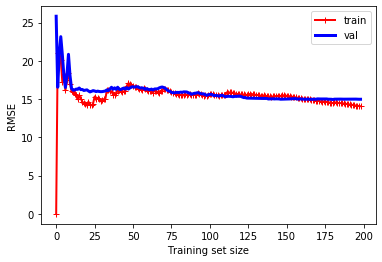

In [20]:
svm_reg = SVR()
#Default is kernel='rbf', degree=3, C=1, epsilon=0.1

plot_learning_curves(svm_reg,X_prepared,Y,200)

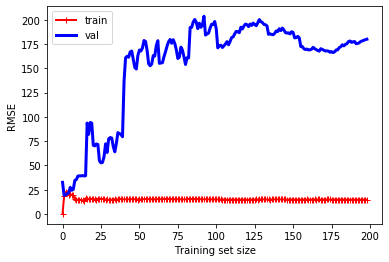

In [23]:
svm_reg = SVR(kernel='poly',degree=8)

plot_learning_curves(svm_reg,X_prepared,Y,200)

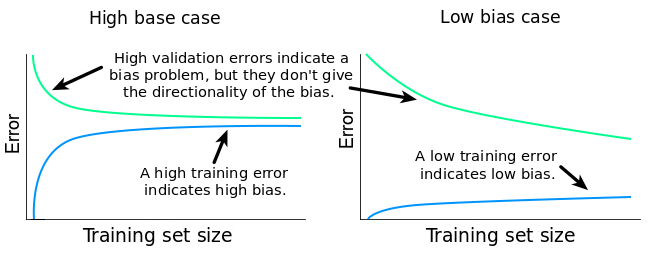

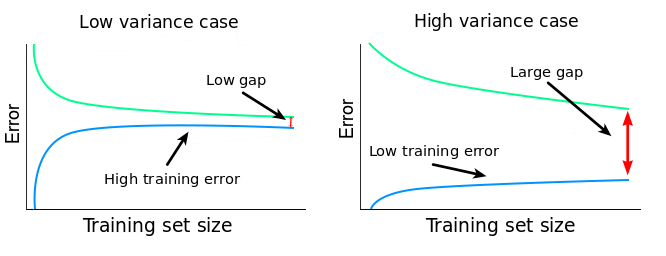

### Decision tree lc

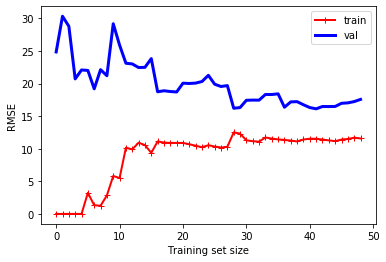

In [22]:
from sklearn.tree import DecisionTreeRegressor

d_tree = DecisionTreeRegressor(max_depth=3)

plot_learning_curves(d_tree,X_prepared,Y,50)